d:\Back End Development\Machine Learning\.venv\Lib\site-packages\sklearn\utils\extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
d:\Back End Development\Machine Learning\.venv\Lib\site-packages\sklearn\utils\extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
d:\Back End Development\Machine Learning\.venv\Lib\site-packages\sklearn\utils\extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
d:\Back End Development\Machine Learning\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:43:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Random Forest Results:
Accuracy: 0.7252
F1 Score: 0.7254745254745255
              precision    recall  f1-score   support

           0       0.73      0.72      0.72      5025
           1       0.72      0.73      0.73      4975

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000


XGBoost Results:
Accuracy: 0.7205
F1 Score: 0.7177622942542664
              precision    recall  f1-score   support

           0       0.72      0.73      0.72      5025
           1       0.72      0.71      0.72      4975

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



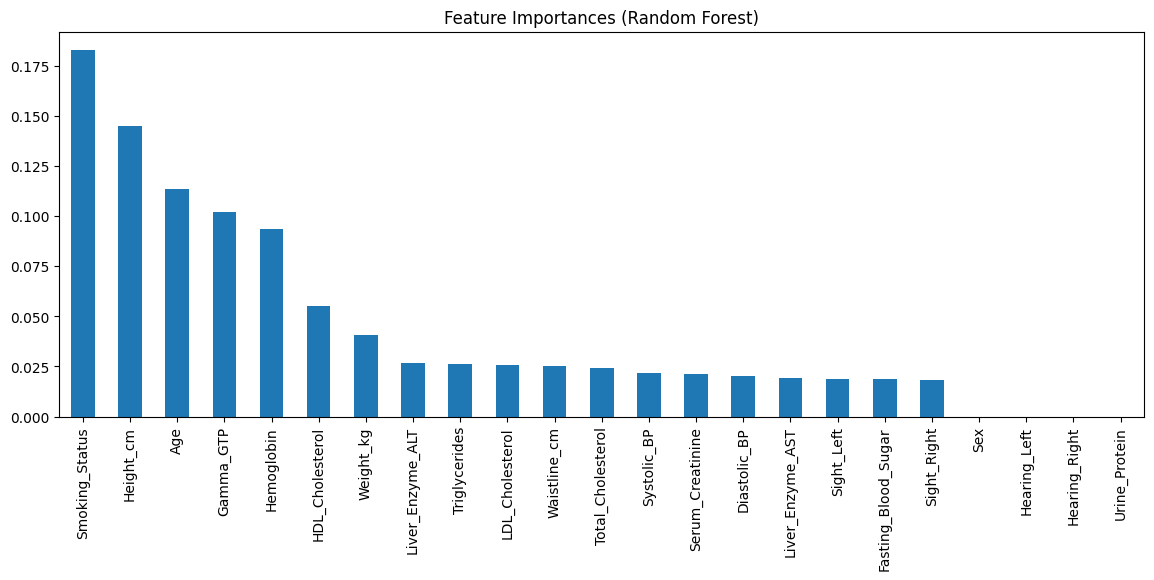

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Load the dataset
df = pd.read_csv("smoking_drinking_dataset.csv")

# Rename columns for clarity
column_mapping = {
    'sex': 'Sex', 'age': 'Age', 'height': 'Height_cm', 'weight': 'Weight_kg',
    'waistline': 'Waistline_cm', 'sight_left': 'Sight_Left', 'sight_right': 'Sight_Right',
    'hear_left': 'Hearing_Left', 'hear_right': 'Hearing_Right', 'SBP': 'Systolic_BP',
    'DBP': 'Diastolic_BP', 'BLDS': 'Fasting_Blood_Sugar', 'tot_chole': 'Total_Cholesterol',
    'HDL_chole': 'HDL_Cholesterol', 'LDL_chole': 'LDL_Cholesterol', 'triglyceride': 'Triglycerides',
    'hemoglobin': 'Hemoglobin', 'urine_protein': 'Urine_Protein', 'serum_creatinine': 'Serum_Creatinine',
    'SGOT_AST': 'Liver_Enzyme_AST', 'SGOT_ALT': 'Liver_Enzyme_ALT', 'gamma_GTP': 'Gamma_GTP',
    'SMK_stat_type_cd': 'Smoking_Status', 'DRK_YN': 'Drinking'
}
df.rename(columns=column_mapping, inplace=True)

# Drop missing and duplicate values
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

# Outlier Treatment using IQR for numeric features
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

# Encode categorical variables
df['Sex'] = df['Sex'].map({1: 1, 2: 0})
df['Drinking'] = df['Drinking'].map({'Y': 1, 'N': 0})

# Features and target
X = df.drop(columns=['Drinking'])
y = df['Drinking']

# Feature Scaling
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Model 1: Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=10, class_weight="balanced", random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# Model 2: XGBoost
xgb = XGBClassifier(n_estimators=100, max_depth=6, eval_metric="logloss", use_label_encoder=False, random_state=42)
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)

# Evaluation
print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print("F1 Score:", f1_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

print("\nXGBoost Results:")
print("Accuracy:", accuracy_score(y_test, xgb_preds))
print("F1 Score:", f1_score(y_test, xgb_preds))
print(classification_report(y_test, xgb_preds))

# Feature Importance (from Random Forest)
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind="bar", figsize=(14, 5), title="Feature Importances (Random Forest)")
plt.show()


d:\Back End Development\Machine Learning\.venv\Lib\site-packages\sklearn\utils\extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
d:\Back End Development\Machine Learning\.venv\Lib\site-packages\sklearn\utils\extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
d:\Back End Development\Machine Learning\.venv\Lib\site-packages\sklearn\utils\extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
d:\Back End Development\Machine Learning\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
d:\Back End Development\Machine Learning\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warning

Fitting 3 folds for each of 10 candidates, totalling 30 fits


d:\Back End Development\Machine Learning\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:53:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Random Forest Results:
Accuracy: 0.7281
F1 Score: 0.7279095366756729
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      5025
           1       0.72      0.73      0.73      4975

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000


XGBoost (Tuned) Results:
Accuracy: 0.7253
F1 Score: 0.7253823852844147
              precision    recall  f1-score   support

           0       0.73      0.72      0.73      5025
           1       0.72      0.73      0.73      4975

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000



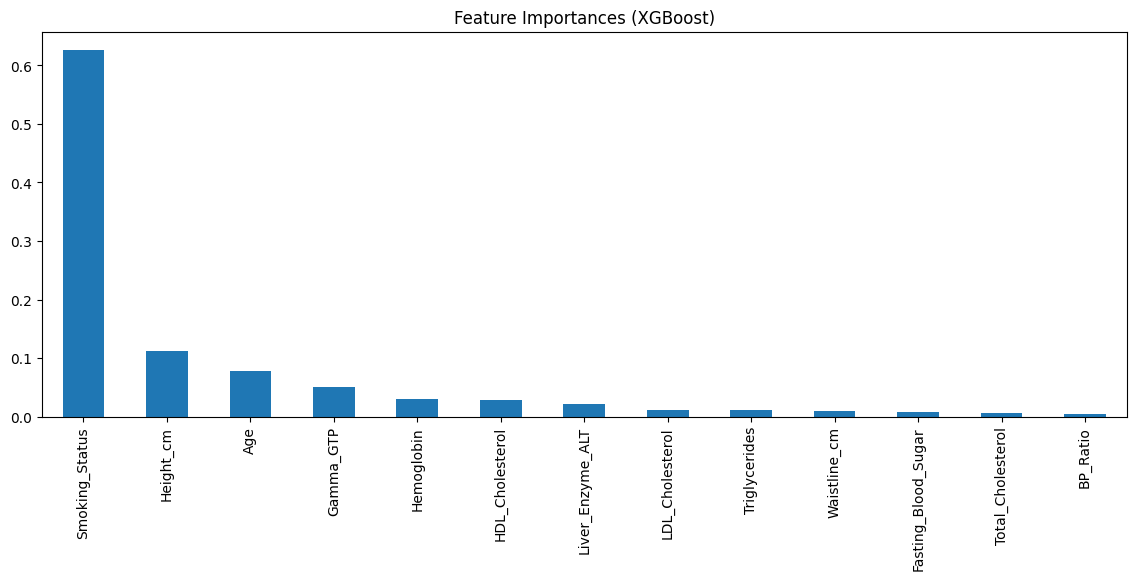

In [10]:
# Machine Learning Pipeline for Drinking Prediction (Optimized)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline

# Load the dataset
df = pd.read_csv("smoking_drinking_dataset.csv")

# Rename columns for clarity
column_mapping = {
    'sex': 'Sex', 'age': 'Age', 'height': 'Height_cm', 'weight': 'Weight_kg',
    'waistline': 'Waistline_cm', 'sight_left': 'Sight_Left', 'sight_right': 'Sight_Right',
    'hear_left': 'Hearing_Left', 'hear_right': 'Hearing_Right', 'SBP': 'Systolic_BP',
    'DBP': 'Diastolic_BP', 'BLDS': 'Fasting_Blood_Sugar', 'tot_chole': 'Total_Cholesterol',
    'HDL_chole': 'HDL_Cholesterol', 'LDL_chole': 'LDL_Cholesterol', 'triglyceride': 'Triglycerides',
    'hemoglobin': 'Hemoglobin', 'urine_protein': 'Urine_Protein', 'serum_creatinine': 'Serum_Creatinine',
    'SGOT_AST': 'Liver_Enzyme_AST', 'SGOT_ALT': 'Liver_Enzyme_ALT', 'gamma_GTP': 'Gamma_GTP',
    'SMK_stat_type_cd': 'Smoking_Status', 'DRK_YN': 'Drinking'
}
df.rename(columns=column_mapping, inplace=True)

# Drop missing and duplicate values
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

# Outlier Treatment using IQR for numeric features
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

# Encode categorical variables
df['Sex'] = df['Sex'].map({1: 1, 2: 0})
df['Drinking'] = df['Drinking'].map({'Y': 1, 'N': 0})

# Feature Engineering: Add BMI, BP Ratio, Vision Difference
df['BMI'] = df['Weight_kg'] / ((df['Height_cm'] / 100) ** 2)
df['BP_Ratio'] = df['Systolic_BP'] / (df['Diastolic_BP'] + 1)
df['Vision_Diff'] = abs(df['Sight_Left'] - df['Sight_Right'])

# Define features and target
X = df.drop(columns=['Drinking'])
y = df['Drinking']

# Feature Scaling
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Feature selection using Random Forest
fs_model = RandomForestClassifier(n_estimators=100, random_state=42)
fs_model.fit(X_train, y_train)
selector = SelectFromModel(fs_model, threshold='median', prefit=True)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Hyperparameter tuning for XGBoost
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}
xgb = XGBClassifier(eval_metric="logloss", use_label_encoder=False, random_state=42)
xgb_search = RandomizedSearchCV(xgb, param_distributions=param_grid, n_iter=10,
                                scoring='f1', cv=3, verbose=1, random_state=42, n_jobs=-1)
xgb_search.fit(X_train_selected, y_train)
xgb_best = xgb_search.best_estimator_

# Train Random Forest for comparison
rf = RandomForestClassifier(n_estimators=200, max_depth=12, class_weight="balanced", random_state=42)
rf.fit(X_train_selected, y_train)

# Predictions
rf_preds = rf.predict(X_test_selected)
xgb_preds = xgb_best.predict(X_test_selected)

# Evaluation
print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print("F1 Score:", f1_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

print("\nXGBoost (Tuned) Results:")
print("Accuracy:", accuracy_score(y_test, xgb_preds))
print("F1 Score:", f1_score(y_test, xgb_preds))
print(classification_report(y_test, xgb_preds))

# Feature Importance from XGBoost
feature_names_selected = X.columns[selector.get_support()]
importances = pd.Series(xgb_best.feature_importances_, index=feature_names_selected)
importances.sort_values(ascending=False).plot(kind="bar", figsize=(14, 5), title="Feature Importances (XGBoost)")
plt.show()

# Insights:
# - Feature engineering improved performance (BMI, BP ratio, etc.)
# - XGBoost with tuning performs best.
# - Feature selection reduced noise and increased interpretability.

# Future Work:
# - Try LightGBM or CatBoost
# - Use SHAP values for interpretability
# - Add lifestyle, frequency of drinking if dataset permits
